***
## Mean-Variance Analysis (Modern portfolio Theory)
***

Mean-variance analysis allows investors to find **the biggest reward at a given level of risk** or **the least risk at a given level of return**.  

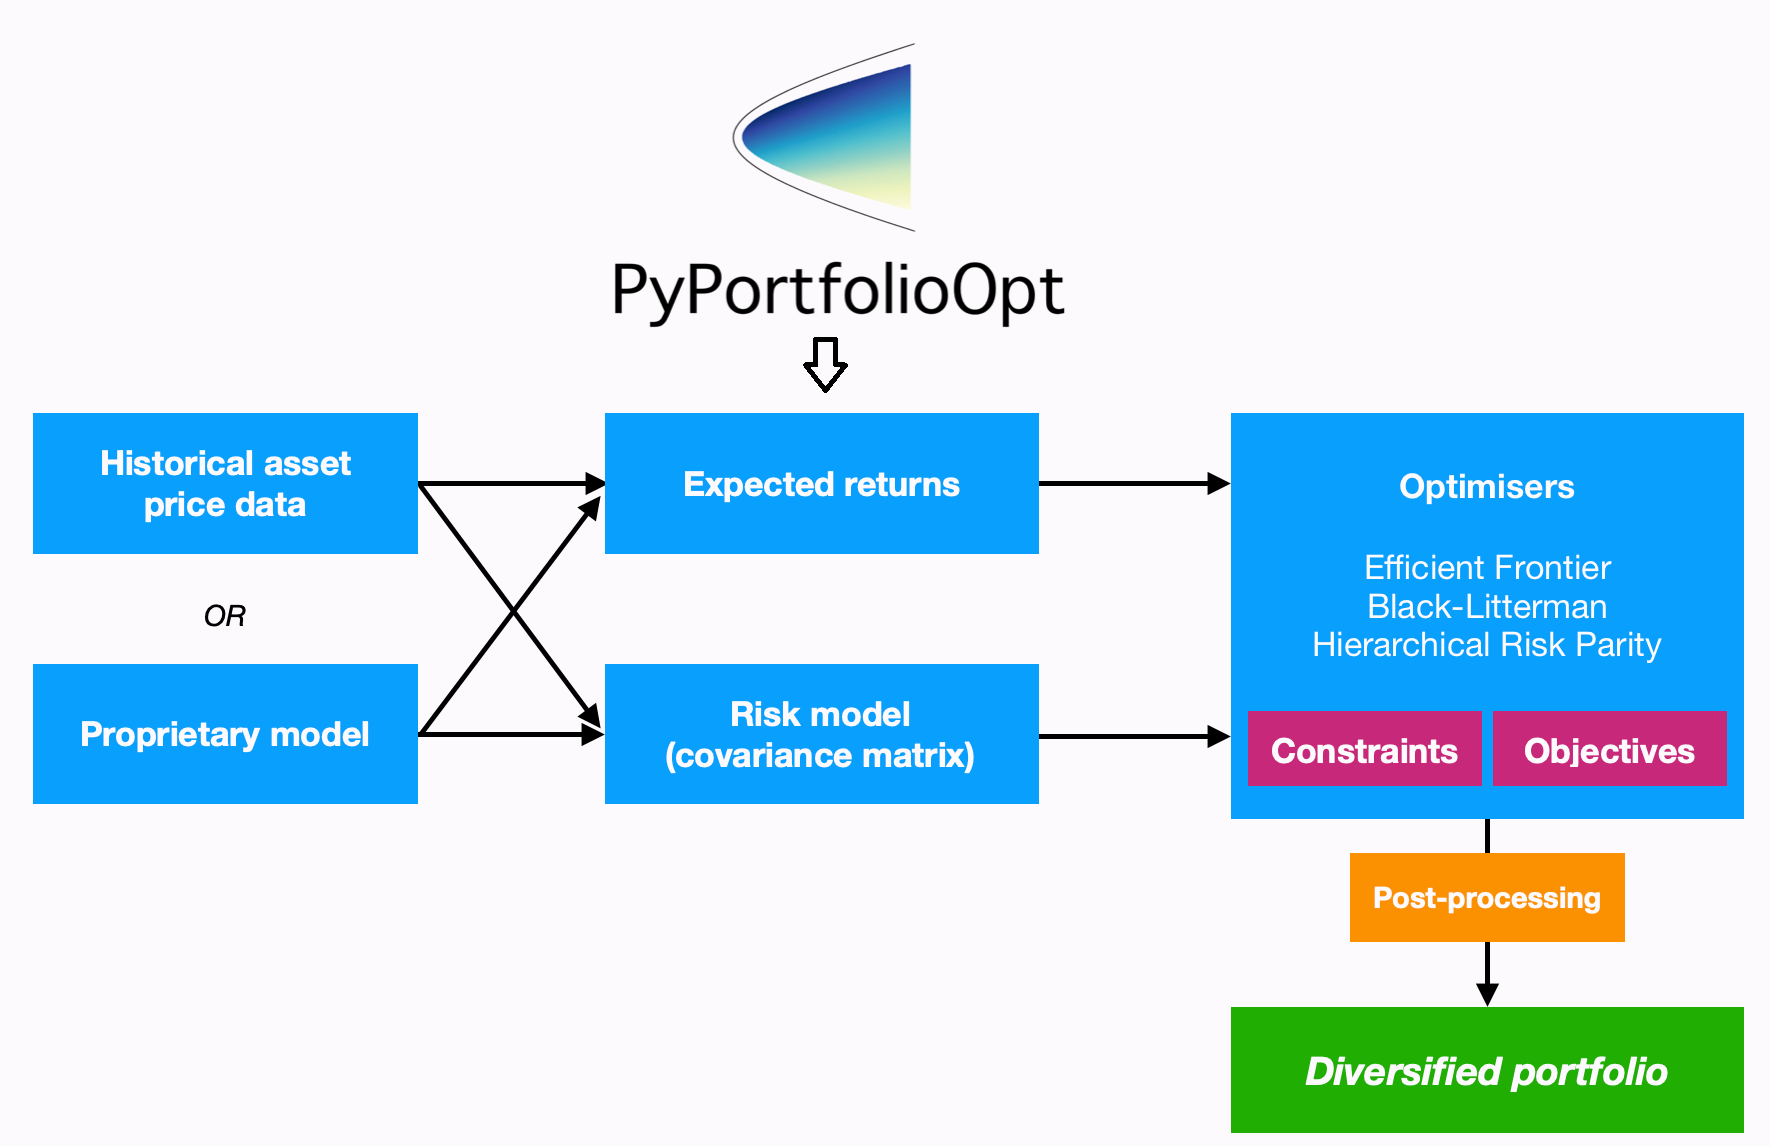
source:https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html


Available risk models in library are:        
                                                      
    sample_cov                               
    semicovariance
    exp_cov
    ledoit_wolf
    ledoit_wolf_constant_variance
    ledoit_wolf_single_factor
    ledoit_wolf_constant_correlation
    oracle_approximating


Available return Estimators in the Library are:

    mean historical return
    exponentially weighted mean historical return
    CAPM estimate of returns


***
Ledoit, O., & Wolf, M. (2003). Honey, I Shrunk the Sample Covariance Matrix The Journal of Portfolio Management, 30(4), 110–119. https://doi.org/10.3905/jpm.2004.110
***


In [4]:
import yfinance as yf
from Portfolio_Optimizor import Portfolio_Optimizor

In [5]:
# First Trust Nasdaq Food & Beverage ETF
# tickers = ['BG','ADM','HSY','TSN','DAR','GIS','CAG','PEP','KDP','SJM','CTVA','K','MDLZ','KO','BGS']
# First Trust Dow Jones Internet Index Fund
# tickers = ['AMZN','FB','GOOGL','CRM','NFLX','PYPL','GOOG','CSCO','SNAP','SNOW','ABNB','ZM','WDAY','TWTR','EBAY']
# Vanguard Mid-Cap Growth ETF [,'MRVL','DLR','VEEV','APH','CDNS','FTNT','INFO','MCHP']
# tickers = ['IDXX','DOCU','CMG','DXCM','SNPS','MSCI','IQV']
# SPDR Portfolio S&P 500 High Dividend ETF
# tickers = ['BKR','CMA','VLO','MPC','OKE','KEY','WMB','MTB','PBCT','RF','HBAN','PSX','MET','SPG','USB']

tickers = ['NFLX','DOCU','TWTR','IDXX','HSY','PYPL']
trackback_years = 5
# Setting this rate to U.S. 3 Month Treasury Bill
risk_free_rate = yf.download(tickers = '^IRX')['Adj Close'][-1]/100


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  6 of 6 completed


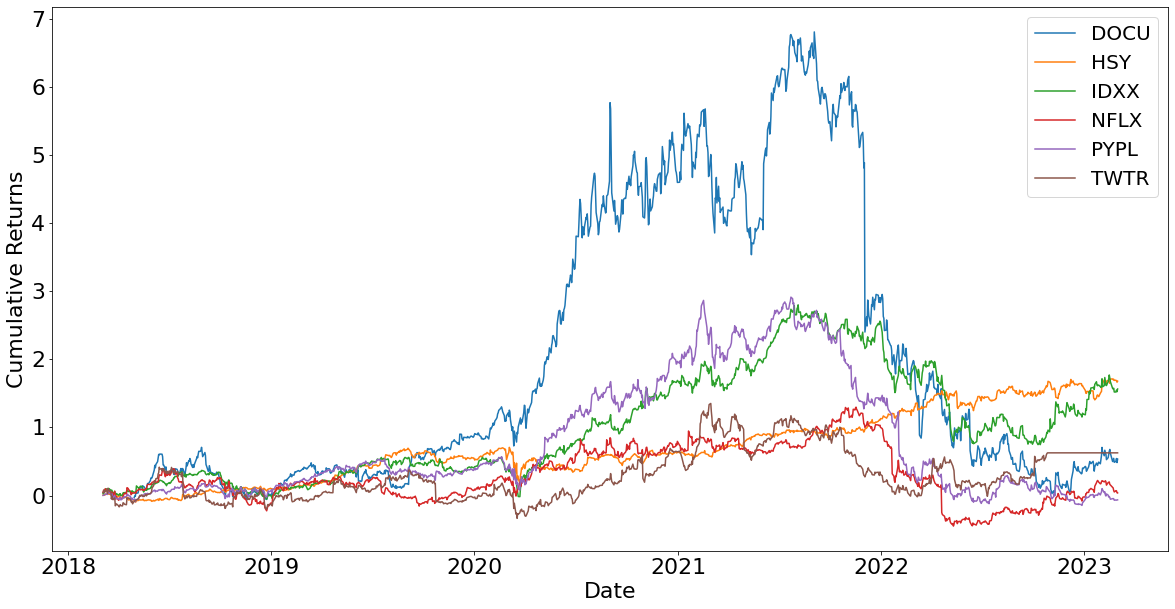

Mean returns of each ticker


,mkt
DOCU,0.240826
HSY,0.054068
IDXX,0.137183
NFLX,0.182235
PYPL,0.182045
TWTR,0.180413


Returns covariance of tickers


,DOCU,HSY,IDXX,NFLX,PYPL,TWTR
DOCU,0.371039,0.000819,0.100081,0.132697,0.137906,0.094676
HSY,0.000819,0.057840,0.021615,0.014093,0.021706,0.020545
IDXX,0.100081,0.021615,0.120857,0.069974,0.081757,0.064108
NFLX,0.132697,0.014093,0.069974,0.224984,0.106877,0.083184
PYPL,0.137906,0.021706,0.081757,0.106877,0.187655,0.096813
TWTR,0.094676,0.020545,0.064108,0.083184,0.096813,0.264342


Weight for best sharpe ratio based on data from 2018-03-02


,DOCU,HSY,IDXX,NFLX,PYPL,TWTR
Weight,0.25511,0.0,0.11654,0.19733,0.2167,0.21432


Expected annual return: 19.1%
Annual volatility: 36.9%
Sharpe Ratio: 0.39


Weight for minimum volatility based on data from 2018-03-02
odict_keys(['DOCU', 'HSY', 'IDXX', 'NFLX', 'PYPL', 'TWTR'])


,DOCU,HSY,IDXX,NFLX,PYPL,TWTR
Weight,0.04357,0.69246,0.15051,0.06818,0.00242,0.04285


Expected annual return: 8.9%
Annual volatility: 21.3%
Sharpe Ratio: 0.20


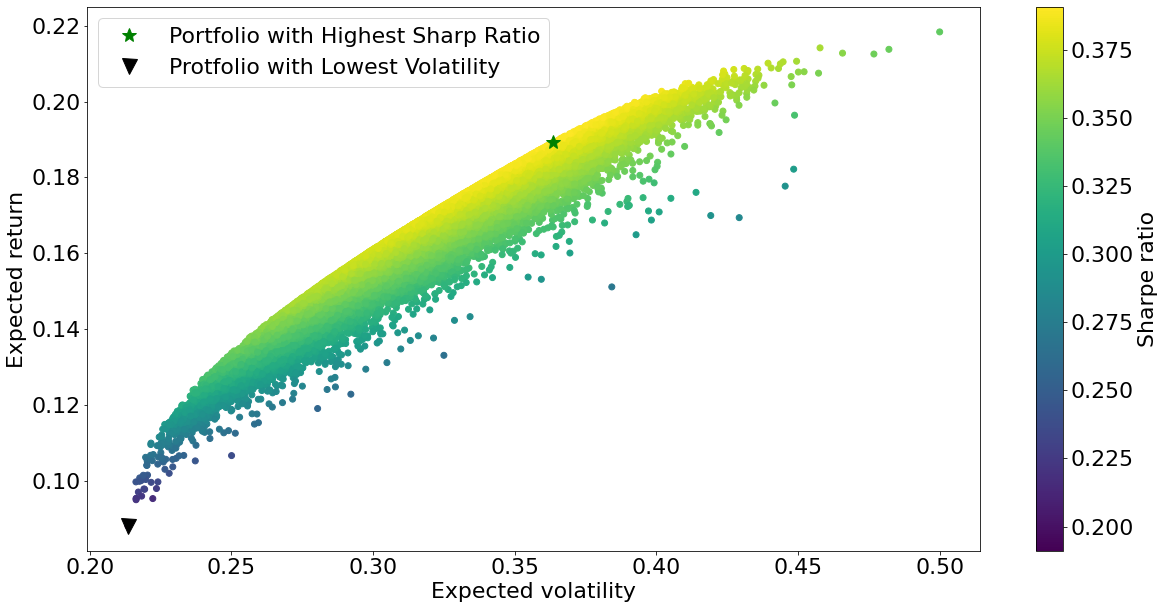

In [6]:
po = Portfolio_Optimizor(tickers, trackback_years, risk_free_rate)
po.visualize_cumulative_returns()
po.get_mean_cov_returns()
_ = po.get_weight()
# For visulations, the final results are showing above
po.visualize_efficient_frontier()